# Car Price Analysis

I used the following dataset `cars.csv` from Kaggle to analyse car prices.

## Import libraries
Before proceeding with data cleaning, I will import Pandas and Numpy libraries into the data file

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [2]:
cars = pd.read_csv("cars.csv", on_bad_lines='skip')

In [3]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,26/3/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,26/3/2016 0:00,0,79588,6/4/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,0,71034,6/4/2016 14:45
2,26/3/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,26/3/2016 0:00,0,35394,6/4/2016 20:15
3,12/3/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,12/3/2016 0:00,0,33729,15/3/2016 3:16
4,1/4/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,1/4/2016 0:00,0,39218,1/4/2016 14:38


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

# Data Cleaning
I will start off with checking for missing values, followed by renaming the columns for easier analysis.

### Checking for missing values

In [5]:
cars.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

### Renaming Columns

In [6]:
cars.rename(columns = {'dateCrawled':'date_time',
                       'name':'car_name',
                       'offerType':'offer_type',
                       'vehicleType':'vehicle_type',
                       'yearOfRegistration':'year_registration',
                       'gearbox':'transmission',
                       'powerPS':'power_ps',
                       'monthOfRegistration':'month_registration',
                       'fuelType':'fuel_type',
                       'notRepairedDamage':'not_repaired_damage',
                       'dateCreated':'date_created',
                       'nrOfPictures':'nr_of_pictures',
                       'postalCode':'postal_code',
                       'lastSeen':'last_seen'},inplace = True)
cars.columns

Index(['date_time', 'car_name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_registration', 'transmission', 'power_ps',
       'model', 'odometer', 'month_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

### Formatting Date & Time
Ensuring that all date values are in numerical format for analysis.

In [7]:
# create two columns, data and time by slicing the 'date time' column
cars['date'] = cars['date_time'].str.split(' ').str[0]
cars['time'] = cars['date_time'].str.split(' ').str[1].str.replace(';',':')

In [8]:
cars['date_time'] =  pd.to_datetime(cars['date_time'])
cars['date'] =  pd.to_datetime(cars['date_time'].dt.date)
cars['time'] = pd.to_datetime(cars.time, format="%H:%M")

# preview the new columns
print(cars[['date_time','date','time']].dtypes)
cars[['date_time','date','time']].head(10)

date_time    datetime64[ns]
date         datetime64[ns]
time         datetime64[ns]
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_21284\111027458.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cars['date_time'] =  pd.to_datetime(cars['date_time'])


,date_time,date,time
0,2016-03-26 17:47:00,2016-03-26,1900-01-01 17:47:00
1,2016-04-04 13:38:00,2016-04-04,1900-01-01 13:38:00
2,2016-03-26 18:57:00,2016-03-26,1900-01-01 18:57:00
3,2016-03-12 16:58:00,2016-03-12,1900-01-01 16:58:00
4,2016-04-01 14:38:00,2016-04-01,1900-01-01 14:38:00
5,2016-03-21 13:47:00,2016-03-21,1900-01-01 13:47:00
6,2016-03-20 17:55:00,2016-03-20,1900-01-01 17:55:00
7,2016-03-16 18:55:00,2016-03-16,1900-01-01 18:55:00
8,2016-03-22 16:51:00,2016-03-22,1900-01-01 16:51:00
9,2016-03-16 13:47:00,2016-03-16,1900-01-01 13:47:00


In [9]:
# create numeric weekdays - this will come in handy in the analysis
cars['weekday'] = cars['date'].apply(pd.to_datetime).dt.dayofweek

# then preview new columns
cars[['date_time','date','time','weekday']].head(10)

,date_time,date,time,weekday
0,2016-03-26 17:47:00,2016-03-26,1900-01-01 17:47:00,5
1,2016-04-04 13:38:00,2016-04-04,1900-01-01 13:38:00,0
2,2016-03-26 18:57:00,2016-03-26,1900-01-01 18:57:00,5
3,2016-03-12 16:58:00,2016-03-12,1900-01-01 16:58:00,5
4,2016-04-01 14:38:00,2016-04-01,1900-01-01 14:38:00,4
5,2016-03-21 13:47:00,2016-03-21,1900-01-01 13:47:00,0
6,2016-03-20 17:55:00,2016-03-20,1900-01-01 17:55:00,6
7,2016-03-16 18:55:00,2016-03-16,1900-01-01 18:55:00,2
8,2016-03-22 16:51:00,2016-03-22,1900-01-01 16:51:00,1
9,2016-03-16 13:47:00,2016-03-16,1900-01-01 13:47:00,2


In [10]:
# also create a categorical weekday label (mon, tue, etc..)

# for this we create a (dayNumber, dayName) dictionary 
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

# and map it to a new dayOfWeek column
cars['dayOfWeek'] = cars["weekday"].map(dayOfWeek)

# then preview new columns
cars[['date_time','date','time','weekday','dayOfWeek']]

,date_time,date,time,weekday,dayOfWeek
0,2016-03-26 17:47:00,2016-03-26,1900-01-01 17:47:00,5,Saturday
1,2016-04-04 13:38:00,2016-04-04,1900-01-01 13:38:00,0,Monday
2,2016-03-26 18:57:00,2016-03-26,1900-01-01 18:57:00,5,Saturday
3,2016-03-12 16:58:00,2016-03-12,1900-01-01 16:58:00,5,Saturday
4,2016-04-01 14:38:00,2016-04-01,1900-01-01 14:38:00,4,Friday
...,...,...,...,...,...
49995,2016-03-27 14:38:00,2016-03-27,1900-01-01 14:38:00,6,Sunday
49996,2016-03-28 10:50:00,2016-03-28,1900-01-01 10:50:00,0,Monday
49997,2016-04-02 14:44:00,2016-04-02,1900-01-01 14:44:00,5,Saturday
49998,2016-03-08 19:25:00,2016-03-08,1900-01-01 19:25:00,1,Tuesday


### Creating Uppercase

In [11]:
cars['brand'] = cars['brand'].str.upper()
cars['model'] = cars['model'].str.upper()
cars['vehicle_type'] = cars['vehicle_type'].str.upper()

### Replacing Values

In [12]:
cars['transmission'] = cars['transmission'].replace({'manuell': 'manual', 'automatik': 'automatic'})
cars.head(5)

,date_time,car_name,seller,offer_type,price,abtest,vehicle_type,year_registration,transmission,power_ps,...,brand,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen,date,time,weekday,dayOfWeek
0,2016-03-26 17:47:00,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,BUS,2004,manual,158,...,PEUGEOT,nein,26/3/2016 0:00,0,79588,6/4/2016 6:45,2016-03-26,1900-01-01 17:47:00,5,Saturday
1,2016-04-04 13:38:00,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,LIMOUSINE,1997,automatic,286,...,BMW,nein,4/4/2016 0:00,0,71034,6/4/2016 14:45,2016-04-04,1900-01-01 13:38:00,0,Monday
2,2016-03-26 18:57:00,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,LIMOUSINE,2009,manual,102,...,VOLKSWAGEN,nein,26/3/2016 0:00,0,35394,6/4/2016 20:15,2016-03-26,1900-01-01 18:57:00,5,Saturday
3,2016-03-12 16:58:00,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,KLEINWAGEN,2007,automatic,71,...,SMART,nein,12/3/2016 0:00,0,33729,15/3/2016 3:16,2016-03-12,1900-01-01 16:58:00,5,Saturday
4,2016-04-01 14:38:00,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,KOMBI,2003,manual,0,...,FORD,nein,1/4/2016 0:00,0,39218,1/4/2016 14:38,2016-04-01,1900-01-01 14:38:00,4,Friday


### Calculating Age from Year
Subtracting the year of registration from the current year.

In [13]:
cars['age'] = datetime.now().year - cars['year_registration']
cars['age'] = cars['age'].astype(np.int64)

cars['age']

0        20
1        27
2        15
3        17
4        21
         ..
49995    13
49996    28
49997    10
49998    11
49999    28
Name: age, Length: 50000, dtype: int64

### Conversion from String to Float variable
Removal of `'$'` and `","` will be necessary to convert the values to a float type.

In [14]:
# removing unwanted characters
cars['price'] = cars['price'].str.replace('$','')
cars['price'] = cars['price'].str.replace(',','')

In [15]:
# storing price values as float type
cars['price'] = cars['price'].astype(float)
cars['price'].head()

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

A smiliar process with the removal of `'km'` and `','` in order for a proper conversion.

In [16]:
# removing unwanted characters
cars['odometer'] = cars['odometer'].str.replace('km','')
cars['odometer'] = cars['odometer'].str.replace(',','')

In [17]:
# storing odometer values as float type
cars['odometer'] = cars['odometer'].astype(float)
cars['odometer'].head()

0    150000.0
1    150000.0
2     70000.0
3     70000.0
4    150000.0
Name: odometer, dtype: float64

### Removing Outliers

In [18]:
# # removing values under 300
# autos.loc[autos['price'] <= 300, 'price'] = np.nan
# # checking that outliers are removed
# price_count = autos['price'].value_counts()
# price_count.sort_index().head(5)

In [19]:
# # removing values over 100000
# autos.loc[autos['price'] >= 100000, 'price'] = np.nan
# # checking that outliers are removed
# price_count = autos['price'].value_counts()
# price_count.sort_index(ascending=False).head(5)

### Conversion from String to Categorical variable
Converting values from string to categorical type will help to save some memory.

In [20]:
# A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory
# convert to categorical column from object data types
cars['car_name'] = cars['car_name'].astype('category')
cars['seller'] = cars['seller'].astype('category')
cars['offer_type'] = cars['offer_type'].astype('category')
cars['abtest'] = cars['abtest'].astype('category') 
cars['vehicle_type'] = cars['vehicle_type'].astype('category') 
cars['transmission'] = cars['transmission'].astype('category') 
cars['fuel_type'] = cars['fuel_type'].astype('category') 
cars['brand'] = cars['brand'].astype('category') 
cars['not_repaired_damage'] = cars['not_repaired_damage'].astype('category')


# preview the new data types
cars.dtypes      

date_time              datetime64[ns]
car_name                     category
seller                       category
offer_type                   category
price                         float64
abtest                       category
vehicle_type                 category
year_registration               int64
transmission                 category
power_ps                        int64
model                          object
odometer                      float64
month_registration              int64
fuel_type                    category
brand                        category
not_repaired_damage          category
date_created                   object
nr_of_pictures                  int64
postal_code                     int64
last_seen                      object
date                   datetime64[ns]
time                   datetime64[ns]
weekday                         int32
dayOfWeek                      object
age                             int64
dtype: object

### Calculate Null Values and Percentage

In [21]:
# view the how many columns have null values and % of nulls
print(pd.concat([cars.isnull().sum().sort_values(), 
                cars.isnull().sum().sort_values()/len(cars)*100],
                axis=1, 
                keys=['null values', 'null values %']))

                     null values  null values %
date_time                      0          0.000
weekday                        0          0.000
time                           0          0.000
date                           0          0.000
last_seen                      0          0.000
postal_code                    0          0.000
nr_of_pictures                 0          0.000
date_created                   0          0.000
brand                          0          0.000
dayOfWeek                      0          0.000
odometer                       0          0.000
month_registration             0          0.000
power_ps                       0          0.000
year_registration              0          0.000
abtest                         0          0.000
price                          0          0.000
offer_type                     0          0.000
seller                         0          0.000
car_name                       0          0.000
age                            0        

In [22]:
cars.describe()

,date_time,price,year_registration,power_ps,odometer,month_registration,nr_of_pictures,postal_code,date,time,weekday,age
count,50000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000,50000,50000.000000,50000.000000
mean,2016-03-21 13:42:56.367599872,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,0.0,50813.627300,2016-03-20 22:01:17.184000,1900-01-01 15:41:39.183599872,2.880800,18.926720
min,2016-03-05 14:06:00,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,2016-03-05 00:00:00,1900-01-01 00:06:00,0.000000,-7975.000000
25%,2016-03-13 14:51:00,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30451.000000,2016-03-13 00:00:00,1900-01-01 12:39:00,1.000000,16.000000
50%,2016-03-21 17:53:30,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49577.000000,2016-03-21 00:00:00,1900-01-01 16:30:00,3.000000,21.000000
75%,2016-03-29 14:36:00,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71540.000000,2016-03-29 00:00:00,1900-01-01 19:50:00,5.000000,25.000000
max,2016-04-07 14:36:00,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000,2016-04-07 00:00:00,1900-01-01 23:59:00,6.000000,1024.000000
std,NaN,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,0.0,25779.747957,NaN,NaN,2.084495,105.712813


### Removing Null Values
For better data analysis, we will remove all columns containing null values.

In [23]:
# dropping rows with null values
cars = cars.dropna(axis=0)
# checking remaining data
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35047 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_time            35047 non-null  datetime64[ns]
 1   car_name             35047 non-null  category      
 2   seller               35047 non-null  category      
 3   offer_type           35047 non-null  category      
 4   price                35047 non-null  float64       
 5   abtest               35047 non-null  category      
 6   vehicle_type         35047 non-null  category      
 7   year_registration    35047 non-null  int64         
 8   transmission         35047 non-null  category      
 9   power_ps             35047 non-null  int64         
 10  model                35047 non-null  object        
 11  odometer             35047 non-null  float64       
 12  month_registration   35047 non-null  int64         
 13  fuel_type            35047 non-null 

# Exploratory Data Analysis
We will proceed with exploring the data to gain more insights and identify any potential anomailes for a smooth analysis.

## Fluctuation of Sales by Year

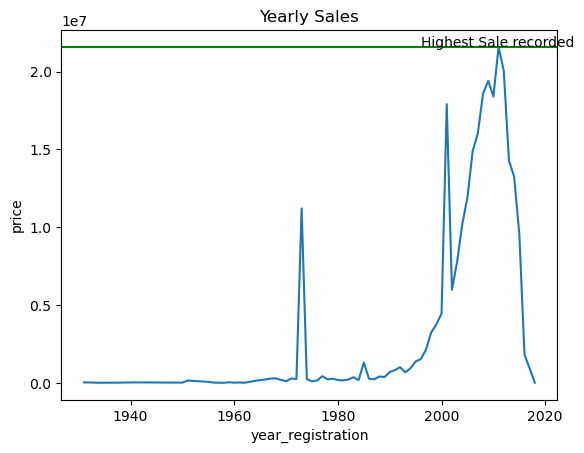

In [24]:
df_yearlysales = cars.groupby('year_registration')['price'].sum().reset_index()
fig = sns.lineplot(df_yearlysales, x='year_registration', y='price')
plt.text(1996,df_yearlysales.max()[1]+400, 'Highest Sale recorded' )
plt.axhline(y=df_yearlysales.max()[1], color='green')
# plt.text(1983, 589, 'Recession')
# plt.text(1990, 7138.8, 'Recession')
# plt.text(2000, 5467, 'Recession')
# plt.text(2009, 7580, 'Recession')
plt.title('Yearly Sales')
plt.show()

In [25]:
cars['price'].head(5)

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64

## Analyzing Registration Year
I will explore the `'year_registration'` column.

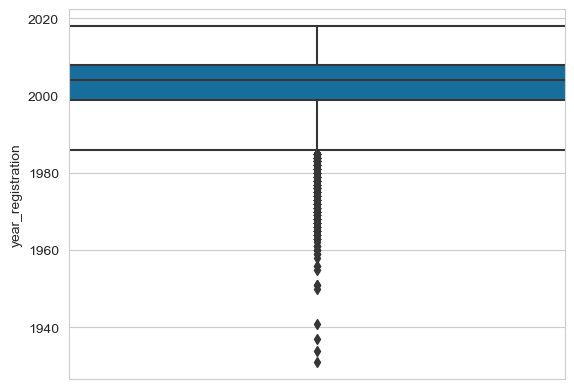

In [26]:
# visualizing outliers in registration year
sns.set_style("whitegrid") 
sns_plot = sns.boxplot(y = 'year_registration', data=cars, palette='colorblind', width=1000)
fig = sns_plot.get_figure()
fig.savefig("regboxplot.png")

### Removing Outliers for Registration Year

In [27]:
# removing abnormally low year values
cars.loc[cars['year_registration'] < 1900, 'year_registration'] = np.nan
# removing abnormally high year values
cars.loc[cars['year_registration'] > 2016, 'year_registration'] = np.nan
# checking that low outliers are removed
reg_count = cars['year_registration'].value_counts()
reg_count.sort_index().head(5)

year_registration
1931.0    1
1934.0    1
1937.0    1
1941.0    1
1950.0    1
Name: count, dtype: int64

### Examining the sale distribution for each brand

In [28]:
# creating list of all brands
brands = cars['brand'].value_counts(normalize=True, 
                                     dropna=False
                                    ).sort_values(ascending=False)
print(brands[:10])

brand
VOLKSWAGEN       0.206551
BMW              0.116900
OPEL             0.102491
MERCEDES_BENZ    0.102348
AUDI             0.091534
FORD             0.066739
RENAULT          0.045396
PEUGEOT          0.029960
FIAT             0.023740
SEAT             0.018975
Name: proportion, dtype: float64


In [29]:
# creating list of all brands
brands = cars['model'].value_counts(normalize=True, 
                                     dropna=False
                                    ).sort_values(ascending=False)
print(brands[:10])

model
GOLF        0.079807
ANDERE      0.077239
3ER         0.060576
POLO        0.032956
CORSA       0.031586
PASSAT      0.029874
ASTRA       0.029846
A4          0.028020
C_KLASSE    0.026793
5ER         0.026678
Name: proportion, dtype: float64


Based on the distribution, these are the top five brands:

* volkswagen       
* opel            
* bmw            
* mercedes_benz   
* audi             

I will only analyze the cars sold from the top 5 brands and models according to the distribution.

{'VOLKSWAGEN': 6340.922503108164, 'BMW': 9077.846473029045, 'OPEL': 6819.006959910913, 'MERCEDES_BENZ': 9452.850292723724, 'AUDI': 10443.236907730674}


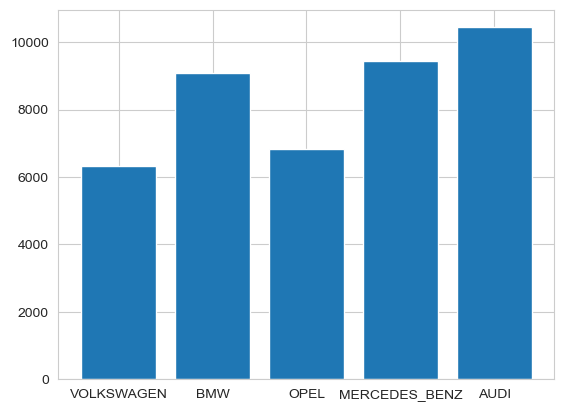

In [30]:
top_brands = {}

brands = ["VOLKSWAGEN", "BMW", "OPEL", "MERCEDES_BENZ", "AUDI"]

# iterating over list to store price agg by mean
for b in brands:
    selected_rows = cars[cars['brand'] == b]
    bmean = selected_rows['price'].mean()
    top_brands[b] = bmean

# viewing price of top brands
print(top_brands)
# visualizing price of top brands
plt.bar(*zip(*top_brands.items()))
plt.savefig('model_dist.png', dpi=300, bbox_inches='tight')
plt.show()

{'VOLKSWAGEN': 126386.93189667081, 'BMW': 131670.73468391507, 'OPEL': 127626.67037861915, 'MERCEDES_BENZ': 129880.12266517982, 'AUDI': 126494.70074812968}


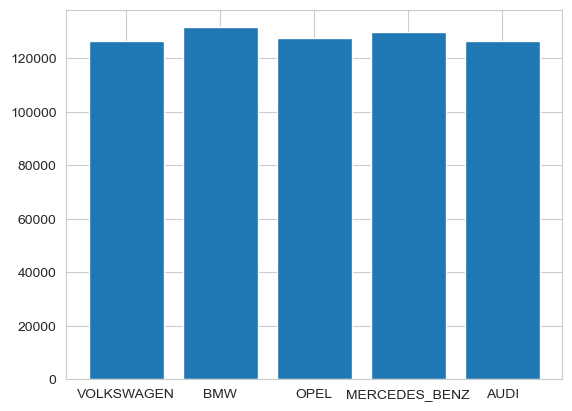

In [31]:
# creating dictionary of top brands by mileage
top_brands_km = {}

brands = ["VOLKSWAGEN", "BMW", "OPEL", "MERCEDES_BENZ", "AUDI"]

# iterating over brands with mileage agg by mean
for b in brands:
    selected_rows = cars[cars['brand'] == b]
    bmeankm = selected_rows['odometer'].mean()
    top_brands_km[b] = bmeankm

# viewing brands and avg mileage
print(top_brands_km)
# visualizing brands and avg mileage
plt.bar(*zip(*top_brands_km.items()))
plt.savefig('km_dist2.png', dpi=300, bbox_inches='tight')

In [32]:
# Converting both dictionaries to series

top_brands = pd.Series(top_brands)
top_brands_km = pd.Series(top_brands_km)

# Converting first series to DataFrame
top_brands_df = pd.DataFrame(top_brands, columns=['mean_price'])

# Assinging other series as new column in the `top_brands_df` dataframe
top_brands_df['mean_km'] = 0
top_brands_df.loc[:,'mean_km'] = top_brands_km

top_brands_df

,mean_price,mean_km
VOLKSWAGEN,6340.922503,126386.931897
BMW,9077.846473,131670.734684
OPEL,6819.006960,127626.670379
MERCEDES_BENZ,9452.850293,129880.122665
AUDI,10443.236908,126494.700748


## Numeric Variable Relationships
Using a pairplot to determine the relationships between the numeric variables in the dataset.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


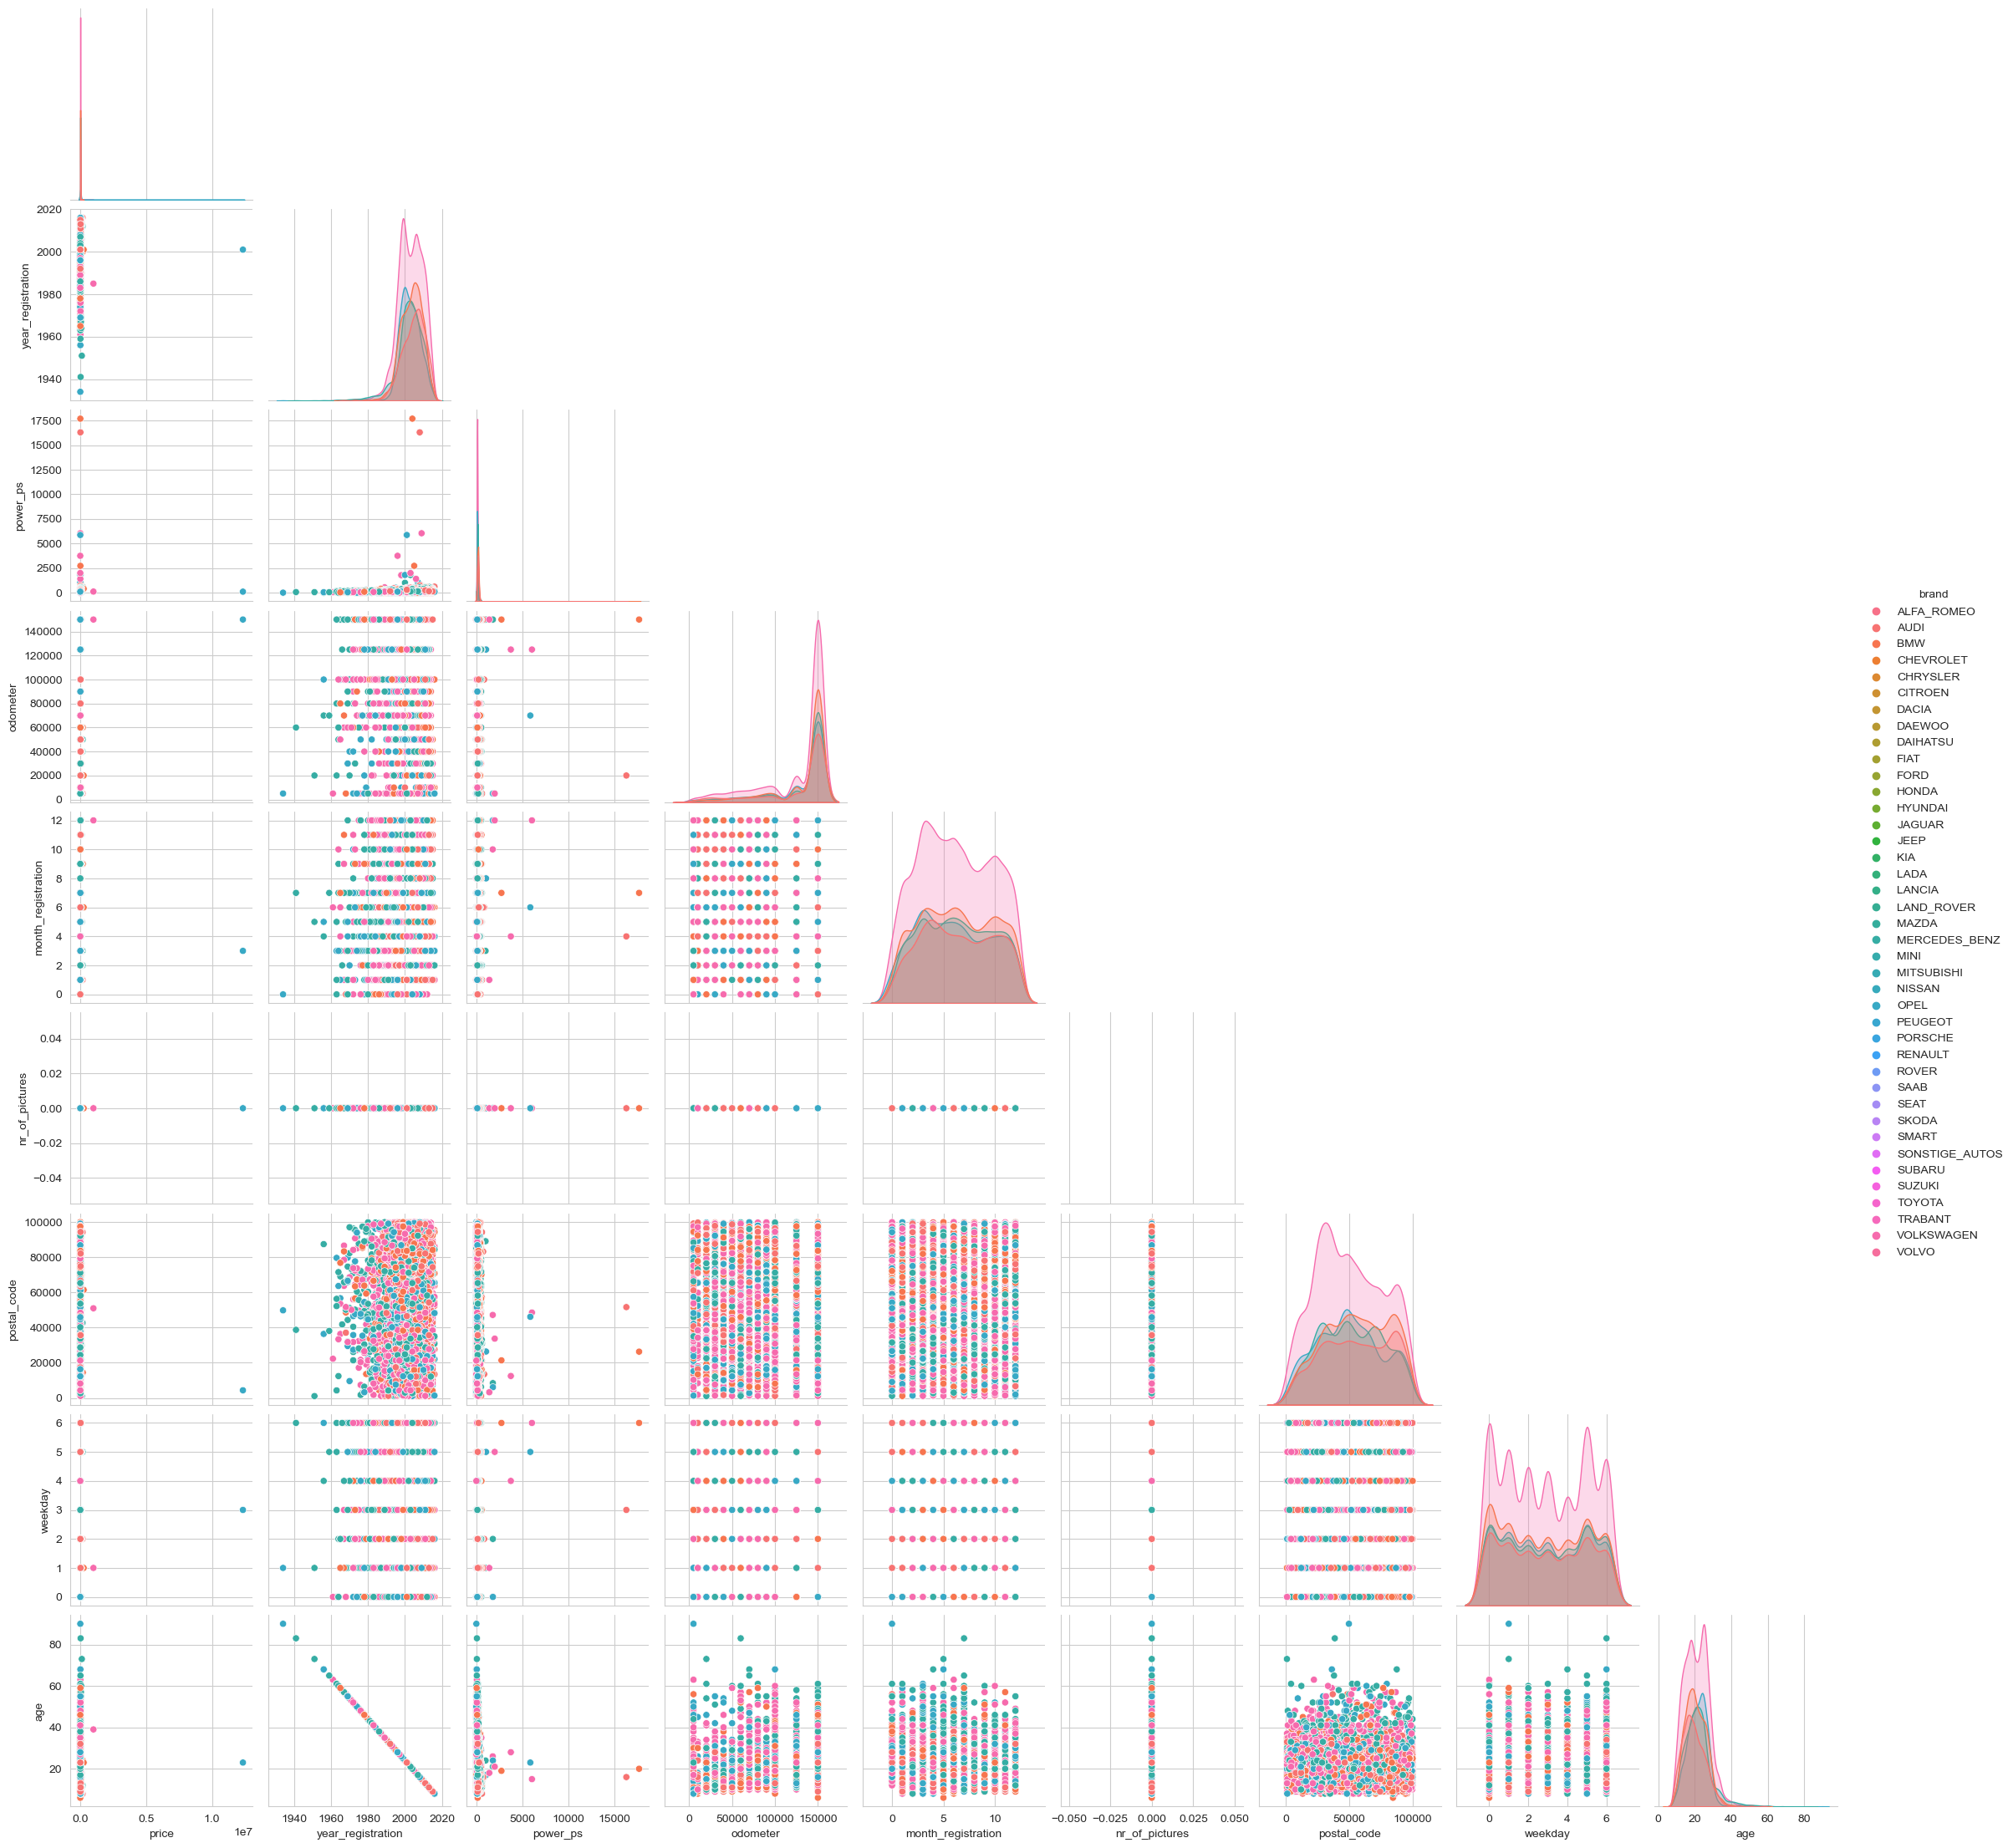

In [33]:
style_list = ["VOLKSWAGEN", "BMW", "OPEL", "MERCEDES_BENZ", "AUDI"]

sns.pairplot(
    cars.query("brand in @style_list"),
    corner=True,
    hue='brand'
)

### Value Retention
I will build a linear relationship plot comparing `odometer` vs. `price`, filtered by `brand`.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


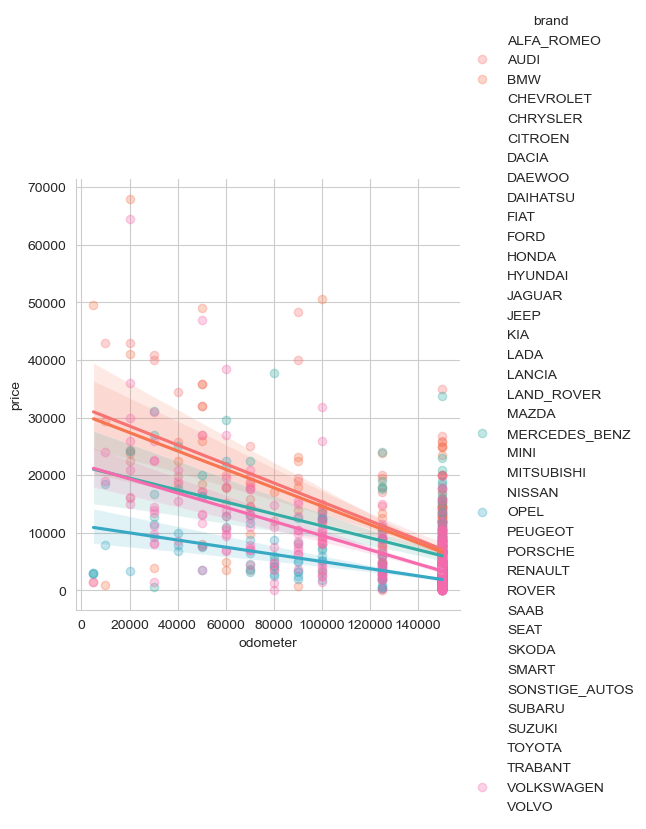

In [34]:
brand_list = ["VOLKSWAGEN", "BMW", "OPEL", "MERCEDES_BENZ", "AUDI"]

sns.lmplot(
    x="odometer",
    y="price",
    data=cars.query("brand in @brand_list and price <150000 and odometer < 200000").sample(1000),
    hue="brand",
    scatter_kws=({"alpha": .3}),
)

In [35]:
import scipy.stats as stats

cars_regress = cars.dropna()

stats.linregress(x=cars_regress["odometer"], y=cars_regress["price"])

LinregressResult(slope=-0.10949297435556428, intercept=21038.701299926142, rvalue=-0.048604318496381096, pvalue=8.701281023218386e-20, stderr=0.012019626386170535, intercept_stderr=1567.0212528721975)

In [36]:
for brand in brand_list:
    data = cars_regress.loc[cars_regress["brand"] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['price'])[0:2]}")

VOLKSWAGEN: (-0.0938153578153958, 18197.957742184393)
BMW: (-0.15295265012210305, 29218.36327492695)
OPEL: (-0.002031351375930371, 7078.261572389933)
MERCEDES_BENZ: (-0.15870233918441695, 30065.129573246773)
AUDI: (-0.16794075326616162, 31686.852235549268)


### Further Exploration on Brand

In [37]:
cars["brand"].value_counts()

brand
VOLKSWAGEN        7239
BMW               4097
OPEL              3592
MERCEDES_BENZ     3587
AUDI              3208
FORD              2339
RENAULT           1591
PEUGEOT           1050
FIAT               832
SEAT               665
SKODA              641
NISSAN             562
MAZDA              521
CITROEN            496
TOYOTA             488
SMART              438
HYUNDAI            372
MINI               368
VOLVO              351
MITSUBISHI         280
KIA                276
HONDA              272
ALFA_ROMEO         246
PORSCHE            245
SUZUKI             225
CHEVROLET          201
CHRYSLER           136
DACIA              107
JEEP                88
LAND_ROVER          83
DAIHATSU            81
SUBARU              74
SAAB                62
JAGUAR              59
DAEWOO              49
ROVER               41
LANCIA              34
TRABANT             32
LADA                19
SONSTIGE_AUTOS       0
Name: count, dtype: int64

In [38]:
top5 = cars["brand"].value_counts().iloc[:5].index

avgs = (cars
        .loc[cars["brand"].isin(top5)]
        .pivot_table(index="brand", 
                     columns="month_registration", 
                     values={"price": "mean"}
                    )
        .droplevel(0, axis=1)
       )

avgs.head()

month_registration,0,1,2,3,4,5,6,7,8,9,10,11,12
brand,,,,,,,,,,,,,
AUDI,4496.849315,12744.330049,10365.959391,11287.205047,9735.407407,10134.250000,9986.977273,11373.375000,10708.415525,10929.236220,9435.904059,10928.134328,9941.676113
BMW,3368.217391,8977.913043,9455.161017,10137.844828,8832.552778,8156.522523,9821.792929,9526.100559,8681.969697,10080.906667,8287.024457,9077.646667,9299.268437
MERCEDES_BENZ,4276.600000,9036.561594,9773.640693,9363.069054,9711.976562,9812.382263,8328.537572,11668.489028,9476.018587,9985.548611,8592.855596,10062.316151,8793.378049
OPEL,1864.565517,2888.738589,3530.436567,32655.633803,3544.033784,3375.649842,3707.698462,3252.908795,3867.968037,3520.787645,3389.095420,3331.735075,3116.953668
VOLKSWAGEN,2192.652510,6627.820312,6809.847780,6209.686275,6666.004405,6297.698083,6418.091729,5752.540134,6385.088000,6608.037106,6234.096667,6332.726415,8000.187373


### Correlation Heat Map
Next, I will plot a heatmap to check the correlation between the numeric variables.

<Axes: title={'center': 'Avg. Price by Brand and Month Registration'}, xlabel='month_registration', ylabel='brand'>

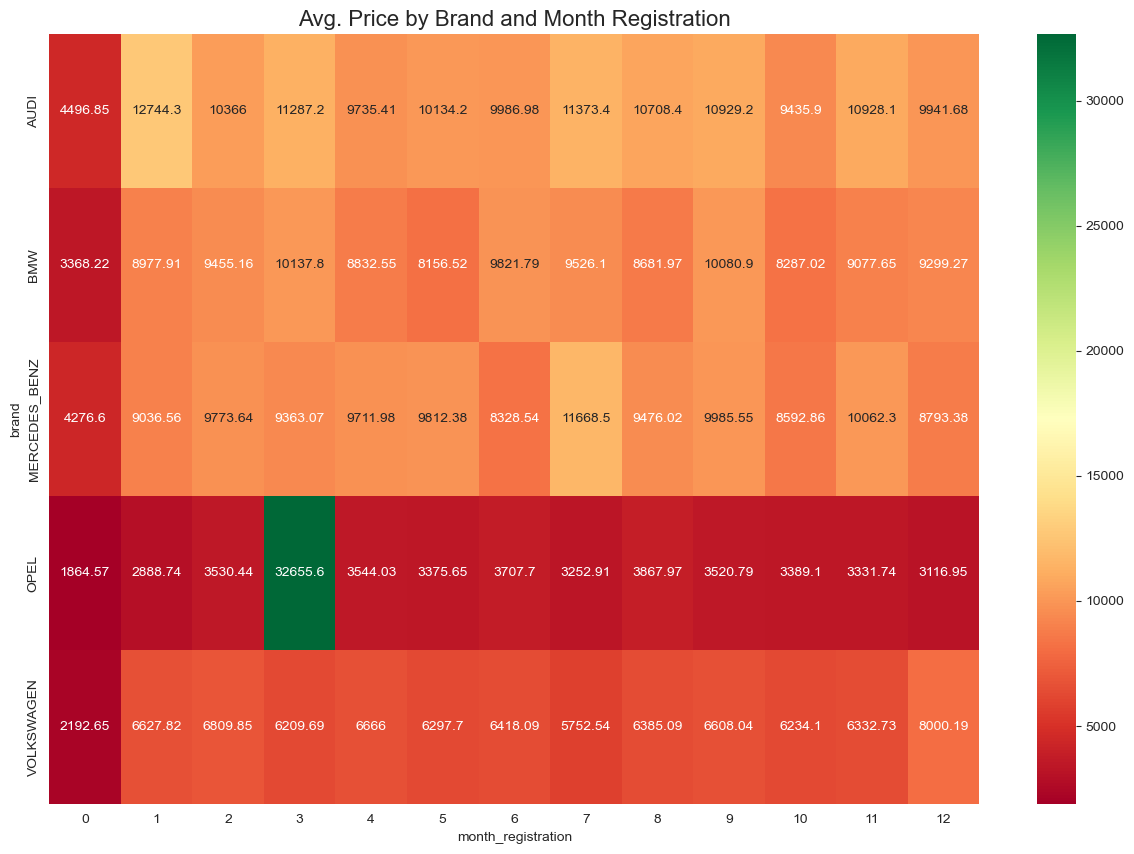

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))


plt.title("Avg. Price by Brand and Month Registration", fontsize=16)

sns.heatmap(
    avgs,
    annot=True,
    cmap="RdYlGn",
    fmt="g"
)

### Grouping of Categorial Data
The data will be grouped based on one or more variables.

In [40]:
cars['transmission'].unique()

['manual', 'automatic']
Categories (2, object): ['automatic', 'manual']

In [54]:
cars_group = cars[['transmission','brand','price']]
cars_group

,transmission,brand,price
0,manual,PEUGEOT,5000.0
1,automatic,BMW,8500.0
2,manual,VOLKSWAGEN,8990.0
3,automatic,SMART,4350.0
4,manual,FORD,1350.0
...,...,...,...
49995,automatic,AUDI,24900.0
49996,manual,OPEL,1980.0
49997,automatic,FIAT,13200.0
49998,manual,AUDI,22900.0


In [55]:
# grouping results
df_gptest = cars[['transmission','brand','price']]
grouped_test1 = df_gptest.groupby(['transmission','brand'],as_index=False).mean()
grouped_test1

,transmission,brand,price
0,automatic,ALFA_ROMEO,6094.105263
1,automatic,AUDI,14477.655709
2,automatic,BMW,13152.364078
3,automatic,CHEVROLET,10235.142857
4,automatic,CHRYSLER,4976.179104
...,...,...,...
75,manual,SUZUKI,4515.726415
76,manual,TOYOTA,5035.064133
77,manual,TRABANT,2173.935484
78,manual,VOLKSWAGEN,5473.293623


### Group variablues using Pivot Table

In [43]:
grouped_pivot = grouped_test1.pivot(index='transmission',columns='brand')
grouped_pivot

price                                            \
brand          ALFA_ROMEO          AUDI           BMW     CHEVROLET   
transmission                                                          
automatic     6094.105263  14477.655709  13152.364078  10235.142857   
manual        4208.656388   8170.435673   6864.869303   5578.435115   

                                                                               \
brand            CHRYSLER      CITROEN        DACIA       DAEWOO     DAIHATSU   
transmission                                                                    
automatic     4976.179104  7045.067568          NaN  1662.250000  1048.916667   
manual        2220.000000  3562.471564  6069.205607  1036.711111  1847.942029   

                           ...                                           \
brand                FIAT  ...          SEAT         SKODA        SMART   
transmission               ...                                            
automatic     4105.782609  ...  12335.346154  12286.506494  4084.247340   
manual        3191.453646  ...   4584.267606   6143.202128  2735.467742   

                                                                    \
brand        SONSTIGE_AUTOS       SUBARU       SUZUKI       TOYOTA   
transmission                                                         
automatic               NaN  4442.714286  4222.230769  8286.985075   
manual                  NaN  4796.566667  4515.726415  5035.064133   

                                                      
brand             TRABANT    VOLKSWAGEN        VOLVO  
transmission                                          
automatic      450.000000  11392.959472  7638.327586  
manual        2173.935484   5473.293623  4339.570213  

[2 rows x 40 columns]

### Fill missing values

In [44]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
brand          ALFA_ROMEO          AUDI           BMW     CHEVROLET   
transmission                                                          
automatic     6094.105263  14477.655709  13152.364078  10235.142857   
manual        4208.656388   8170.435673   6864.869303   5578.435115   

                                                                               \
brand            CHRYSLER      CITROEN        DACIA       DAEWOO     DAIHATSU   
transmission                                                                    
automatic     4976.179104  7045.067568     0.000000  1662.250000  1048.916667   
manual        2220.000000  3562.471564  6069.205607  1036.711111  1847.942029   

                           ...                                           \
brand                FIAT  ...          SEAT         SKODA        SMART   
transmission               ...                                            
automatic     4105.782609  ...  12335.346154  12286.506494  4084.247340   
manual        3191.453646  ...   4584.267606   6143.202128  2735.467742   

                                                                    \
brand        SONSTIGE_AUTOS       SUBARU       SUZUKI       TOYOTA   
transmission                                                         
automatic               0.0  4442.714286  4222.230769  8286.985075   
manual                  0.0  4796.566667  4515.726415  5035.064133   

                                                      
brand             TRABANT    VOLKSWAGEN        VOLVO  
transmission                                          
automatic      450.000000  11392.959472  7638.327586  
manual        2173.935484   5473.293623  4339.570213  

[2 rows x 40 columns]

In [45]:
df_gptest2 = cars[['brand','price']]
grouped_rest_bodystyle = df_gptest2.groupby(['brand'], as_index=False).mean()
grouped_rest_bodystyle

,brand,price
0,ALFA_ROMEO,4354.280488
1,AUDI,10443.236908
2,BMW,9077.846473
3,CHEVROLET,7200.174129
4,CHRYSLER,3577.823529
5,CITROEN,4082.052419
6,DACIA,6069.205607
7,DAEWOO,1087.775510
8,DAIHATSU,1729.567901
9,FIAT,3216.729567


### Examining the top model based on sales distribution
Filtering `model` to "GOLF" 

In [46]:
golfs = cars[cars["model"] == "GOLF"]

golfs.head()

,date_time,car_name,seller,offer_type,price,abtest,vehicle_type,year_registration,transmission,power_ps,...,not_repaired_damage,date_created,nr_of_pictures,postal_code,last_seen,date,time,weekday,dayOfWeek,age
2,2016-03-26 18:57:00,Volkswagen_Golf_1.6_United,privat,Angebot,8990.0,test,LIMOUSINE,2009.0,manual,102,...,nein,26/3/2016 0:00,0,35394,6/4/2016 20:15,2016-03-26,1900-01-01 18:57:00,5,Saturday,15
7,2016-03-16 18:55:00,Golf_IV_1.9_TDI_90PS,privat,Angebot,1990.0,control,LIMOUSINE,1998.0,manual,90,...,nein,16/3/2016 0:00,0,53474,7/4/2016 3:17,2016-03-16,1900-01-01 18:55:00,2,Wednesday,26
38,2016-03-21 15:51:00,Volkswagen_Golf_1.4_Special,privat,Angebot,2850.0,control,LIMOUSINE,2002.0,manual,75,...,nein,21/3/2016 0:00,0,63674,28/3/2016 12:16,2016-03-21,1900-01-01 15:51:00,0,Monday,22
40,2016-03-07 14:50:00,VW_Golf__4_Cabrio_2.0_GTI_16V___Leder_MFA_Alus...,privat,Angebot,3500.0,control,CABRIO,1999.0,manual,150,...,nein,7/3/2016 0:00,0,6780,12/3/2016 2:15,2016-03-07,1900-01-01 14:50:00,0,Monday,25
58,2016-03-30 12:25:00,Volkswagen_Golf_1.4,privat,Angebot,4200.0,control,LIMOUSINE,2004.0,manual,75,...,nein,30/3/2016 0:00,0,56073,1/4/2016 8:29,2016-03-30,1900-01-01 12:25:00,2,Wednesday,20


<Axes: xlabel='price', ylabel='Count'>

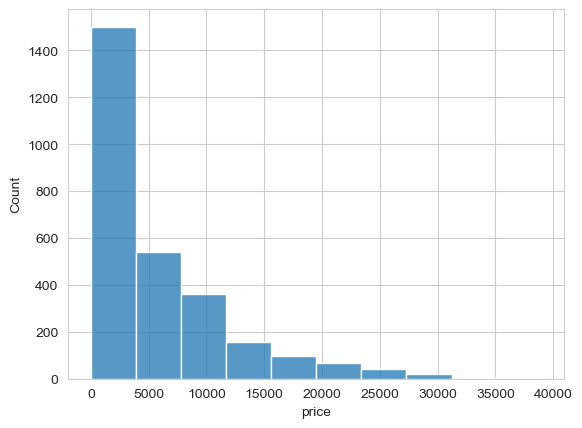

In [47]:
sns.histplot(x="price",
            bins=10,
            data=golfs)

In [48]:
cars['vehicle_type'].head(5)

0           BUS
1     LIMOUSINE
2     LIMOUSINE
3    KLEINWAGEN
4         KOMBI
Name: vehicle_type, dtype: category
Categories (8, object): ['ANDERE', 'BUS', 'CABRIO', 'COUPE', 'KLEINWAGEN', 'KOMBI', 'LIMOUSINE', 'SUV']

### Barplot

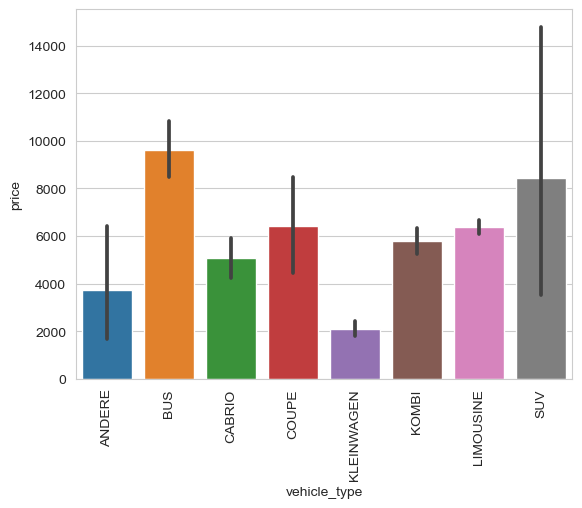

In [49]:
fig, ax = plt.subplots()

sns.barplot(x="vehicle_type", y="price", data=golfs)

plt.xticks(rotation=90)

plt.show()

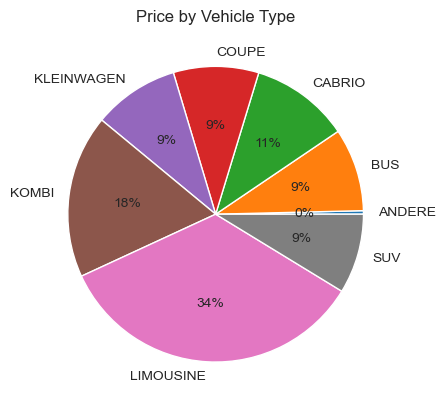

In [50]:
df_r = cars.groupby('vehicle_type')['price'].sum()
plt.pie(df_r, labels=df_r.index, autopct="%0.0f%%")
plt.title('Price by Vehicle Type')
plt.show()

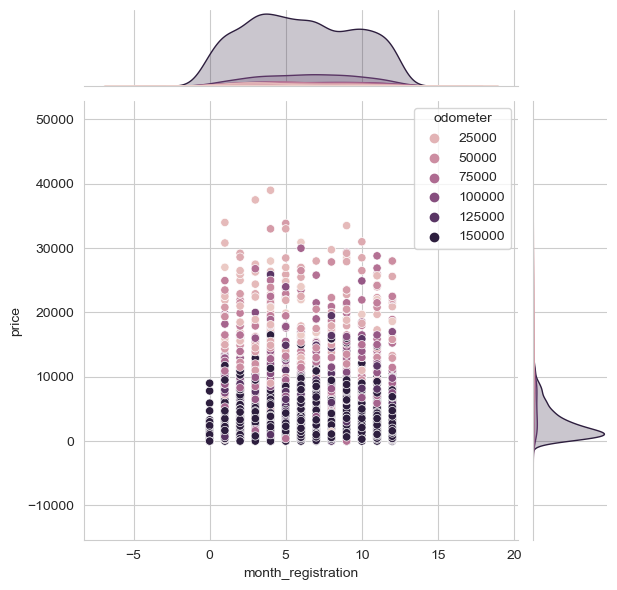

In [51]:
sns.jointplot(
    x="month_registration", 
    y="price", 
    kind="scatter", 
    data=golfs, 
    hue="odometer"
)